Epoch 1/100
14/14 [==============================] - 2s 5ms/step - loss: 0.3939 - acc: 0.8615
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3216 - acc: 0.8920
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2778 - acc: 0.9155
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2277 - acc: 0.9108
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2233 - acc: 0.9038
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2122 - acc: 0.9085
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2038 - acc: 0.9178
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2226 - acc: 0.9178
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.1990 - acc: 0.9319
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.1939 - acc: 0.9272
Epoch 11/100
14/14 [==============================] - 0s 4m

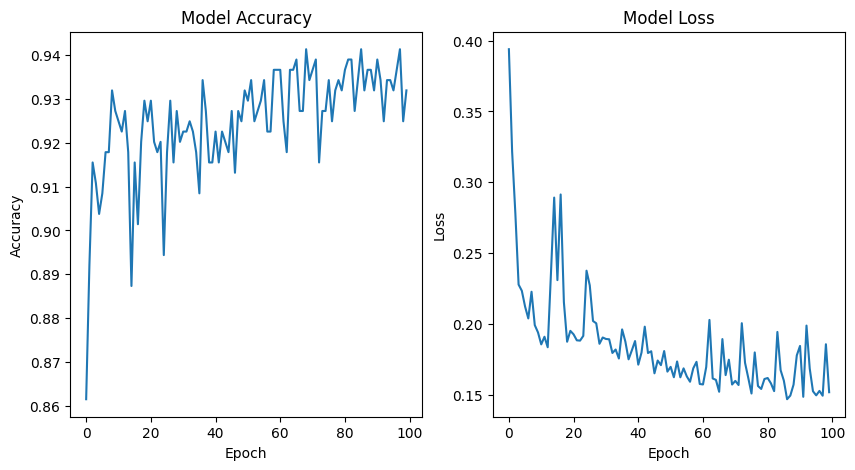

In [29]:
#Add more Dense layers to the existing code and check how the accuracy changes.
path_to_csv = '/content/breastcancer.csv'

import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# loading dataset
cancer_data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target,
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_nn_model = Sequential() # creating the model
my_nn_model.add(Dense(20, input_dim=30, activation='relu')) # hidden layer 1
my_nn_model.add(Dense(32, activation='relu')) # hidden layer 2
my_nn_model.add(Dense(16, activation='relu')) # hidden layer 3
my_nn_model.add(Dense(8, activation='relu')) # hidden layer 4
my_nn_model.add(Dense(1, activation='sigmoid')) # output layer
my_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_nn_fitted = my_nn_model.fit(X_train, Y_train, epochs=100,
                         initial_epoch=0)

print(my_nn_model.summary())
print(my_nn_model.evaluate(X_test, Y_test))

# Plot the accuracy graph
accuracy_history = my_nn_fitted.history['acc']
loss_history = my_nn_fitted.history['loss']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(accuracy_history)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

Epoch 1/100
14/14 [==============================] - 2s 27ms/step - loss: 15.3996 - acc: 0.6197 - val_loss: 5.8028 - val_acc: 0.6503
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 3.9942 - acc: 0.3404 - val_loss: 1.1919 - val_acc: 0.3357
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7795 - acc: 0.5141 - val_loss: 0.5958 - val_acc: 0.7902
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4681 - acc: 0.8638 - val_loss: 0.4521 - val_acc: 0.8811
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 0.3020 - acc: 0.9085 - val_loss: 0.3276 - val_acc: 0.8741
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2251 - acc: 0.9155 - val_loss: 0.3218 - val_acc: 0.8811
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2142 - acc: 0.9225 - val_loss: 0.2726 - val_acc: 0.8951
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1995 

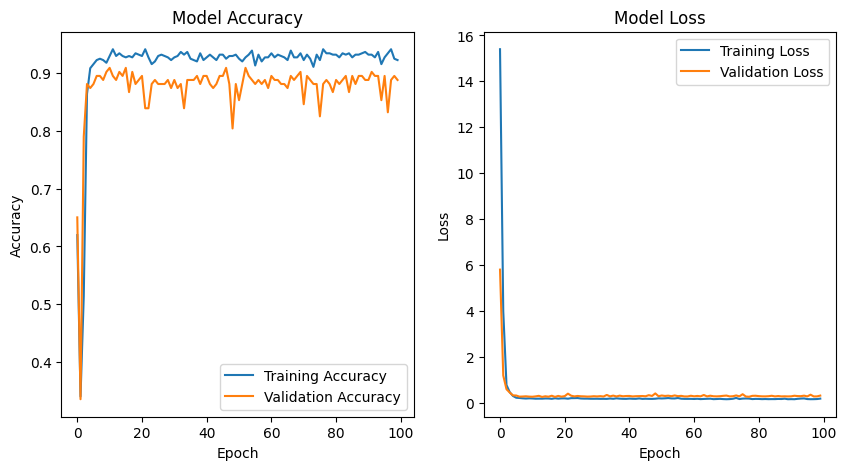

In [30]:
#Change the data source to Breast Cancer dataset * available in the source code folder and make required changes. Report accuracy of the model.
path_to_csv = '/content/breastcancer.csv'

import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# loading dataset
cancer_data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target,
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_nn_model = Sequential() # creating the model
my_nn_model.add(Dense(20, input_dim=30, activation='relu')) # hidden layer 1
my_nn_model.add(Dense(32, activation='relu')) # hidden layer 2
my_nn_model.add(Dense(16, activation='relu')) # hidden layer 3
my_nn_model.add(Dense(8, activation='relu')) # hidden layer 4
my_nn_model.add(Dense(1, activation='sigmoid')) # output layer
my_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_nn_fitted = my_nn_model.fit(X_train, Y_train, epochs=100,
                         initial_epoch=0, validation_data=(X_test, Y_test))

print(my_nn_model.summary())
print(my_nn_model.evaluate(X_test, Y_test))

# Plot the accuracy and loss graphs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(my_nn_fitted.history['acc'], label='Training Accuracy')
plt.plot(my_nn_fitted.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(my_nn_fitted.history['loss'], label='Training Loss')
plt.plot(my_nn_fitted.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/100
14/14 [==============================] - 1s 19ms/step - loss: 0.4140 - acc: 0.8451 - val_loss: 0.3726 - val_acc: 0.9231
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2906 - acc: 0.9484 - val_loss: 0.2785 - val_acc: 0.9510
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2219 - acc: 0.9601 - val_loss: 0.2258 - val_acc: 0.9510
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1811 - acc: 0.9624 - val_loss: 0.1931 - val_acc: 0.9580
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1556 - acc: 0.9624 - val_loss: 0.1718 - val_acc: 0.9650
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1377 - acc: 0.9648 - val_loss: 0.1579 - val_acc: 0.9650
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.1251 - acc: 0.9648 - val_loss: 0.1470 - val_acc: 0.9650
Epoch 8/100
14/14 [==============================] - 0s 7ms/step - loss: 0.1149 - 

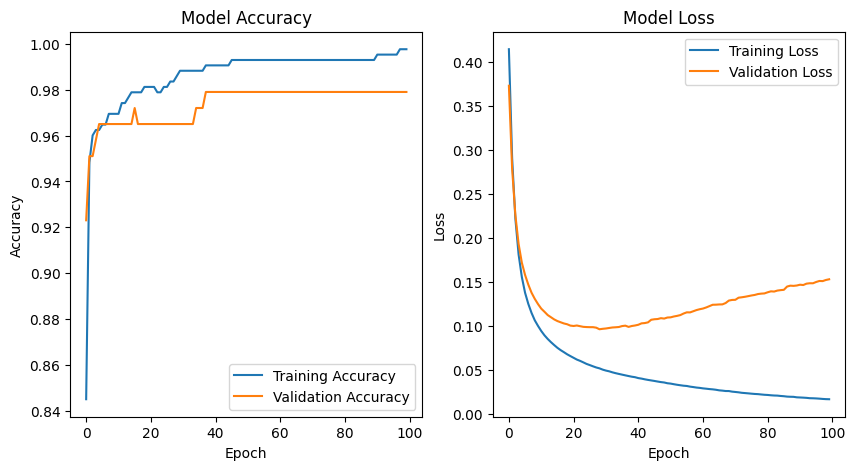

In [31]:
# Normalize the data before feeding the data to the model and check how the normalization change your accuracy

path_to_csv = '/content/breastcancer.csv'

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# loading dataset
cancer_data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target,
                                                    test_size=0.25, random_state=87)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

np.random.seed(155)
my_nn_model = Sequential() # creating model
my_nn_model.add(Dense(20, input_dim=30, activation='relu')) # hidden layer 1
my_nn_model.add(Dense(1, activation='sigmoid')) # output layer
my_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_nn_fitted = my_nn_model.fit(X_train, Y_train, epochs=100,
                         initial_epoch=0, validation_data=(X_test, Y_test))

print(my_nn_model.summary())
print(my_nn_model.evaluate(X_test, Y_test))

# Plot the accuracy and loss graphs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(my_nn_fitted.history['acc'], label='Training Accuracy')
plt.plot(my_nn_fitted.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(my_nn_fitted.history['loss'], label='Training Loss')
plt.plot(my_nn_fitted.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
469/469 [==============================] - 16s 27ms/step - loss: 0.2499 - accuracy: 0.9248 - val_loss: 0.1104 - val_accuracy: 0.9650
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1009 - accuracy: 0.9693 - val_loss: 0.0767 - val_accuracy: 0.9757
Epoch 3/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0721 - accuracy: 0.9778 - val_loss: 0.0788 - val_accuracy: 0.9764
Epoch 4/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0584 - accuracy: 0.9812 - val_loss: 0.0685 - val_accuracy: 0.9789
Epoch 5/20
469/469 [==============================] - 12s 27ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0657 - val_accuracy: 0.9801
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0389 - accuracy: 0.9868 - val_loss: 0.0580 - val_accuracy: 0.9829
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - l

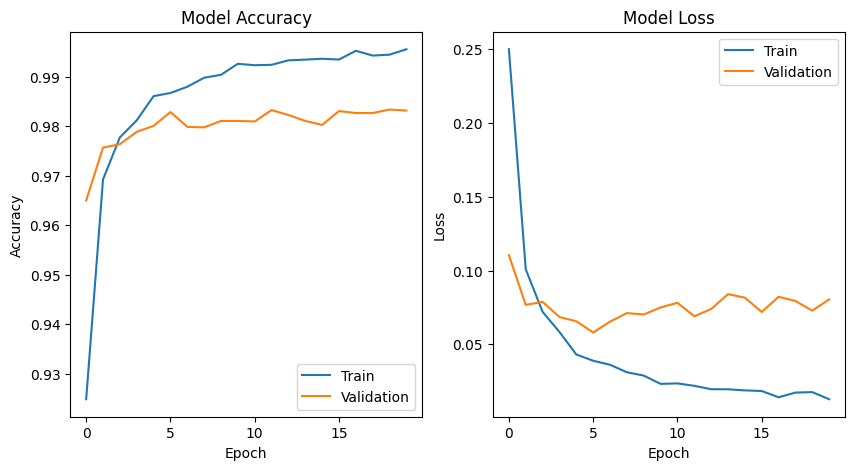

In [7]:
# Plot the loss and accuracy for both training data and validation data using the history object in the source code
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# converting class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# creating a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the model and record the training history
history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                    epochs=20, batch_size=128)

# to plot the training and validation accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

Epoch 1/20
469/469 [==============================] - 15s 30ms/step - loss: 0.2504 - accuracy: 0.9250 - val_loss: 0.1000 - val_accuracy: 0.9679
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1008 - accuracy: 0.9689 - val_loss: 0.0925 - val_accuracy: 0.9705
Epoch 3/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0735 - accuracy: 0.9768 - val_loss: 0.0704 - val_accuracy: 0.9776
Epoch 4/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.0611 - val_accuracy: 0.9801
Epoch 5/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0473 - accuracy: 0.9843 - val_loss: 0.0595 - val_accuracy: 0.9822
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0392 - accuracy: 0.9872 - val_loss: 0.0634 - val_accuracy: 0.9805
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0340 - accuracy: 0.9885 - val_loss: 0.0671 - val_accuracy:

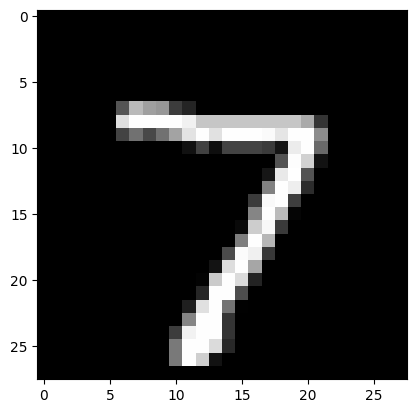

1/1 [==============================] - 0s 112ms/step
Model prediction: 7


In [8]:
#  Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# loading mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# converting class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# to create a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# to train the model
model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
          epochs=20, batch_size=128)

# to plot one of the images in the test data
plt.imshow(x_test[0], cmap='gray')
plt.show()

# making a prediction on the image using the trained model
prediction = model.predict(x_test[0].reshape(1, -1))
print('Model prediction:', np.argmax(prediction))

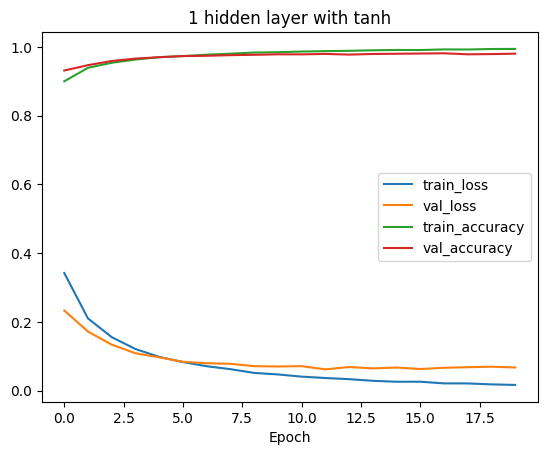

1 hidden layer with tanh - Test loss: 0.0677, Test accuracy: 0.9804


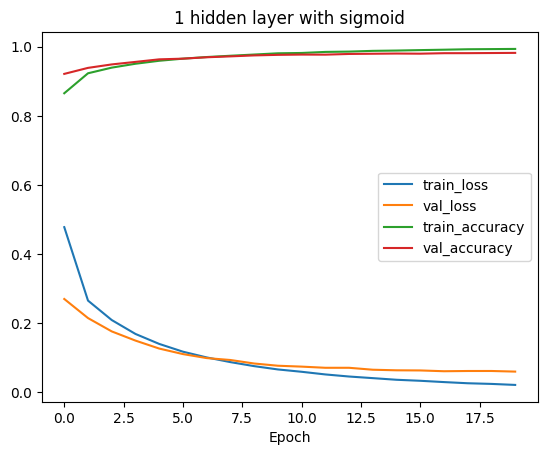

1 hidden layer with sigmoid - Test loss: 0.0598, Test accuracy: 0.9823


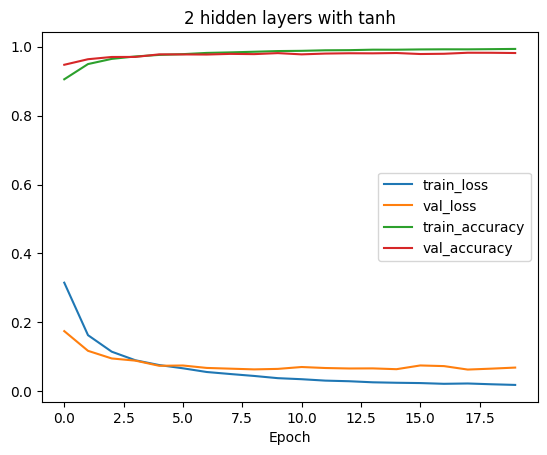

2 hidden layers with tanh - Test loss: 0.0689, Test accuracy: 0.9815


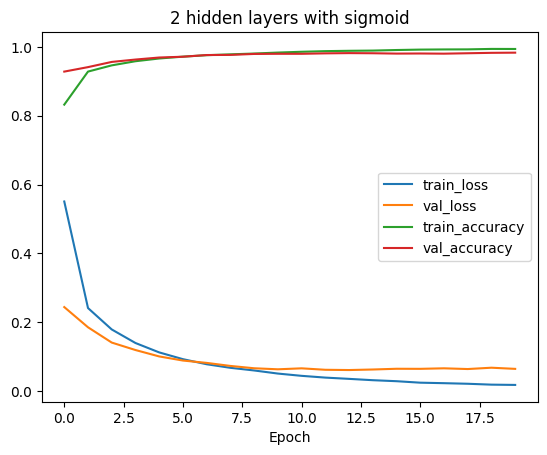

2 hidden layers with sigmoid - Test loss: 0.0646, Test accuracy: 0.9831


In [33]:
# We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))

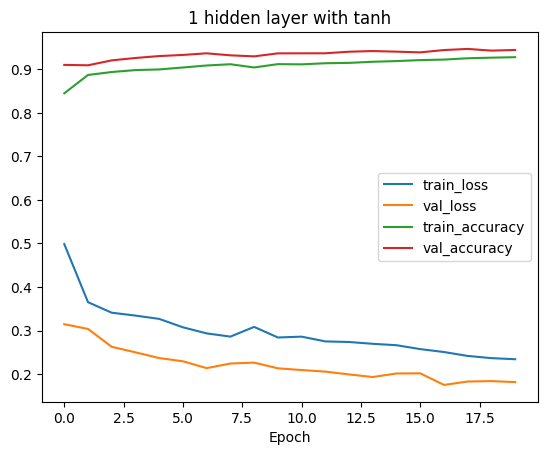

1 hidden layer with tanh - Test loss: 0.1816, Test accuracy: 0.9445


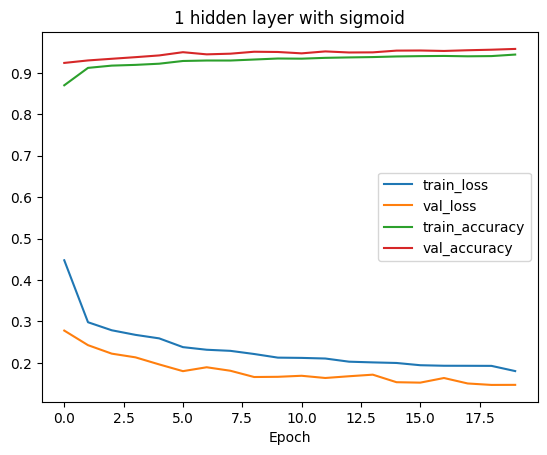

1 hidden layer with sigmoid - Test loss: 0.1468, Test accuracy: 0.9578


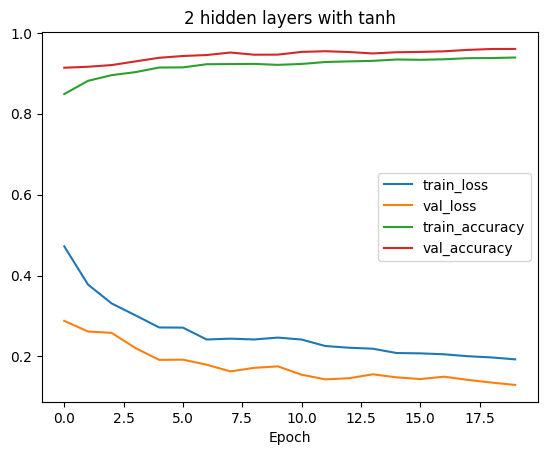

2 hidden layers with tanh - Test loss: 0.1296, Test accuracy: 0.9602


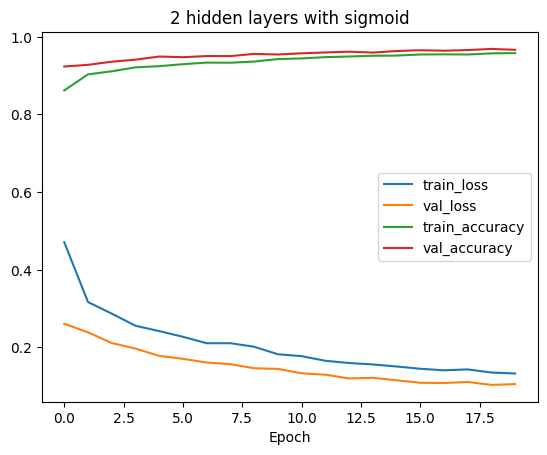

2 hidden layers with sigmoid - Test loss: 0.1056, Test accuracy: 0.9665


In [34]:
#Run the same code without scaling the images and check the performance?
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))